In [1]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=4c24d0ae182d7aa437e65bfe4c02a64d272068b97862fb8e21d1eaa9408afa0e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
!pip install cufflinks

In [3]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 7.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot 
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [5]:
df = pd.read_excel("/content/Data_Train.xlsx")

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.shape

(10683, 11)

##EDA

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Removing the NaN values from the dataset

df.dropna(how='any',inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##Feature Engineering

Converting  Date_of_Journey to its appropriate format as datetime with regards to day and month

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'])
df["Day_of_Journey"]=pd.to_datetime(df['Date_of_Journey']).dt.day
df["Month_of_Journey"]=pd.to_datetime(df['Date_of_Journey']).dt.month

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [14]:
 # Dropping the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)


Converting **'Dep_Time'** to its appropriate format as datetime with regards to hour and minute

In [15]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
#Dropping the 'Dep_Time'
df.drop(["Dep_Time"],axis=1,inplace=True)

Converting **'Arrival_Time'** to its appropriate format as datetime with regards to hour and minute

In [17]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [18]:
#Dropping the 'Arrival_Time'
df.drop(["Arrival_Time"],axis=1,inplace=True)


Converting **'Duration'** to its appropriate format

In [19]:
 duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based space ' '
 

In [20]:
duration[1].fillna('00m',inplace=True) #fill all "NAN" with '00m'


In [21]:
df['duration_hr']=duration[0].apply(lambda x:x[:-1])#select the item at index 0 and leave the last one ﴾in this case the 'h'﴿
df['duration_min']=duration[1].apply(lambda x:x[:-1]) #select the item at index 1 and leave the last one ﴾in this case the 'm'﴿

In [22]:

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
df.drop("Duration", inplace=True, axis=1)

In [24]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Airline and Price** **Plot**

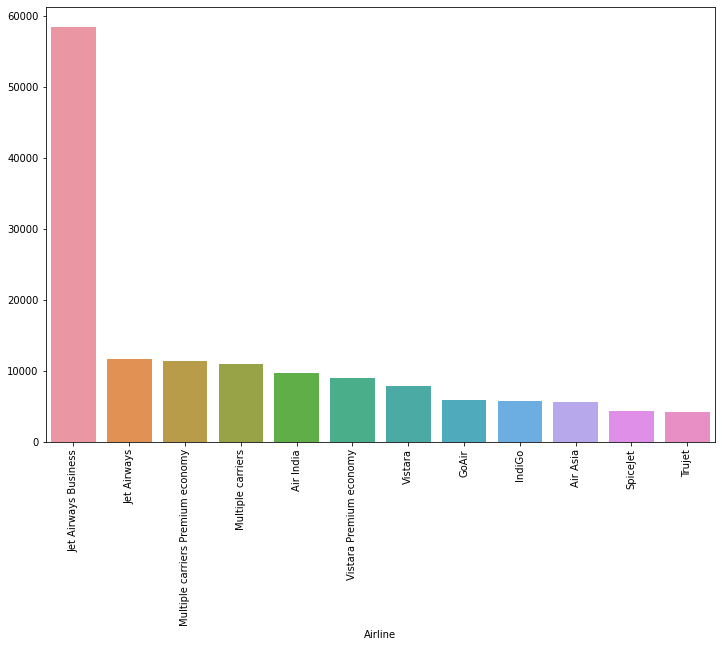

In [25]:
import warnings
warnings.filterwarnings("ignore")

Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False) 
plt.figure(figsize=(12,8))
sns.barplot(Airprices.index,Airprices.values);
plt.xticks(rotation=90);

Jet Airways Business has the highest price with Trujet having the lowest

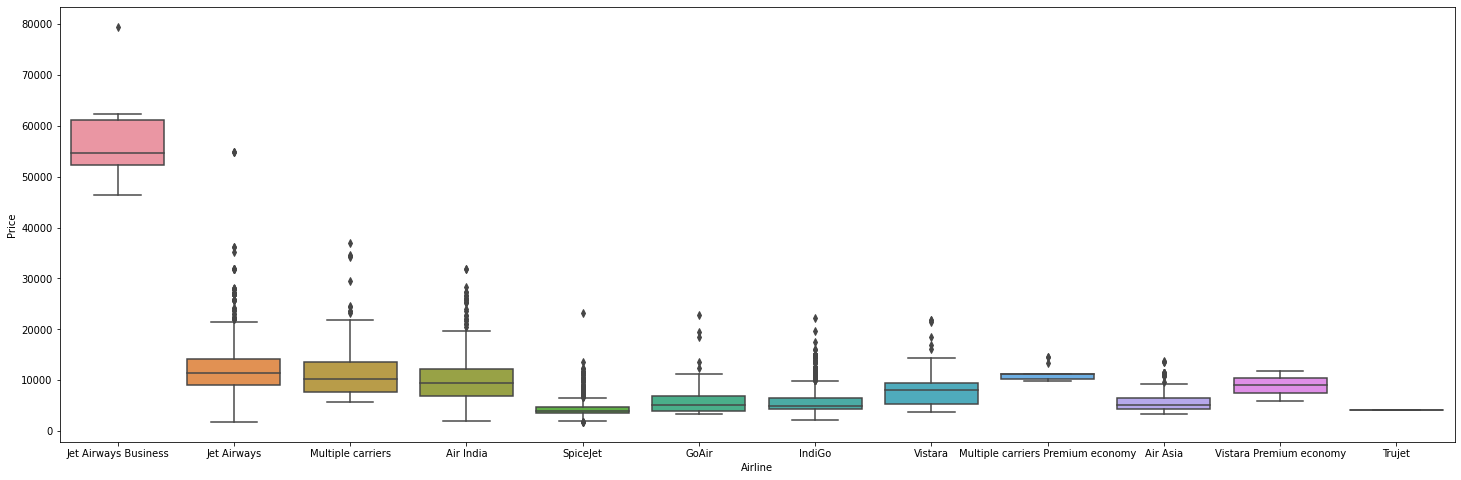

In [26]:

plt.figure(figsize=(25,8))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False)) 
plt.show()

In [27]:
### Checking the prices based on the number of stops

df.groupby(['Airline','Total_Stops'])['Price'].agg("mean").sort_values(ascending=False)

Airline                            Total_Stops
Jet Airways Business               1 stop         62844.250000
                                   2 stops        49387.500000
Air India                          4 stops        17686.000000
Multiple carriers                  3 stops        17292.750000
                                   2 stops        14809.395349
Jet Airways                        2 stops        13387.247467
                                   1 stop         12512.741223
Air India                          3 stops        12208.054054
                                   2 stops        12092.779101
Multiple carriers Premium economy  1 stop         11418.846154
Multiple carriers                  1 stop         10711.316157
Vistara                            1 stop          9641.148837
Air India                          1 stop          9041.509259
Vistara Premium economy            non-stop        8962.333333
IndiGo                             2 stops         7507.526316
        

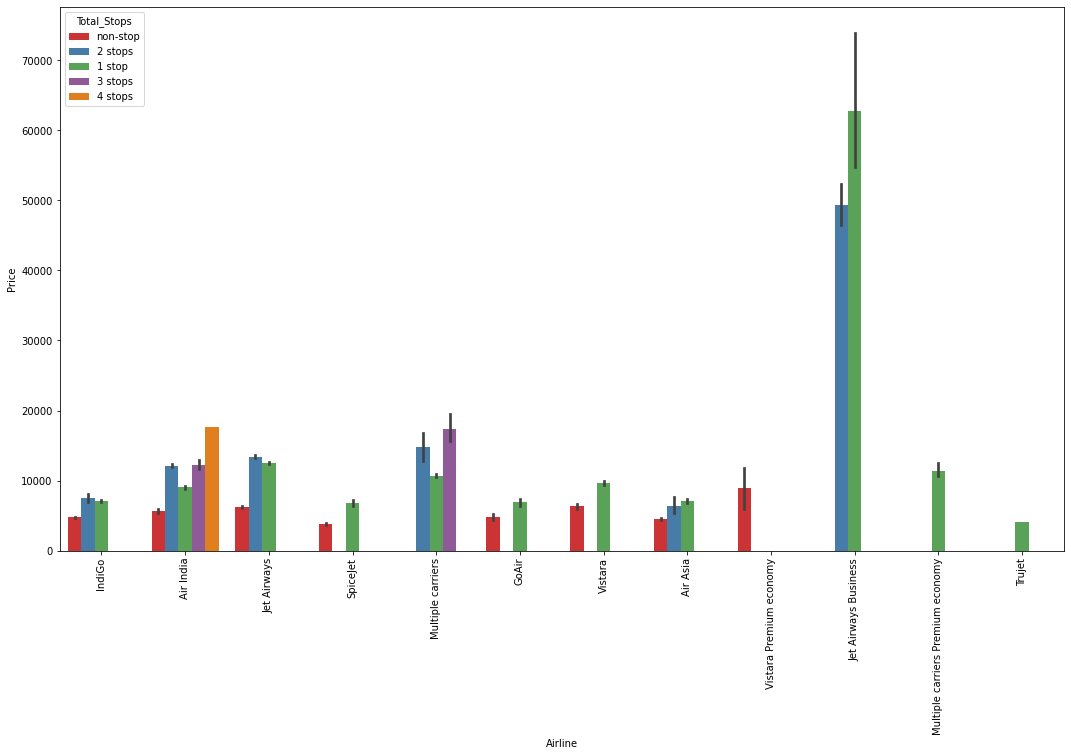

In [28]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

One stop and two stpos Jet Airways Business is having the highest price

**Source and Price**

In [29]:

df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

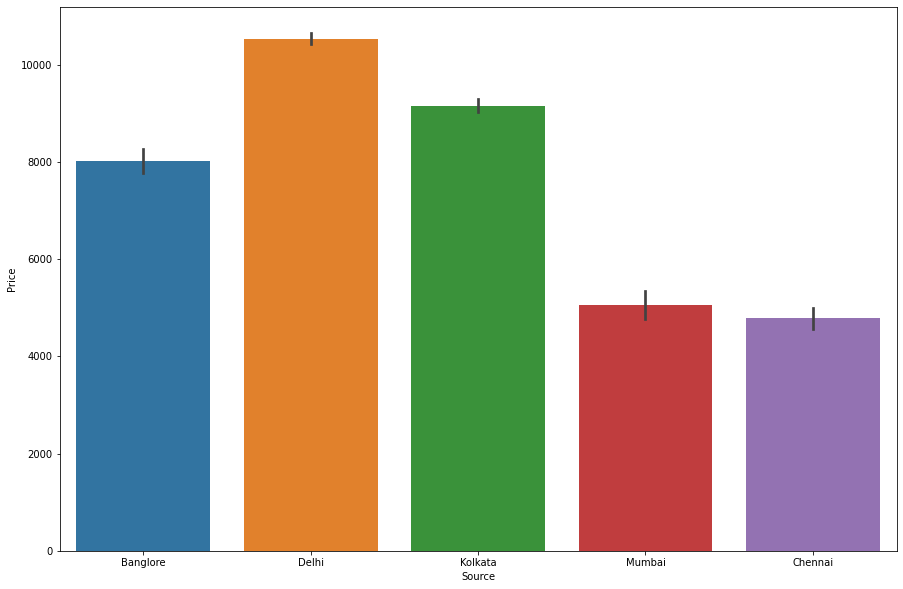

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False)) 
plt.show()


**Destination adn Price**

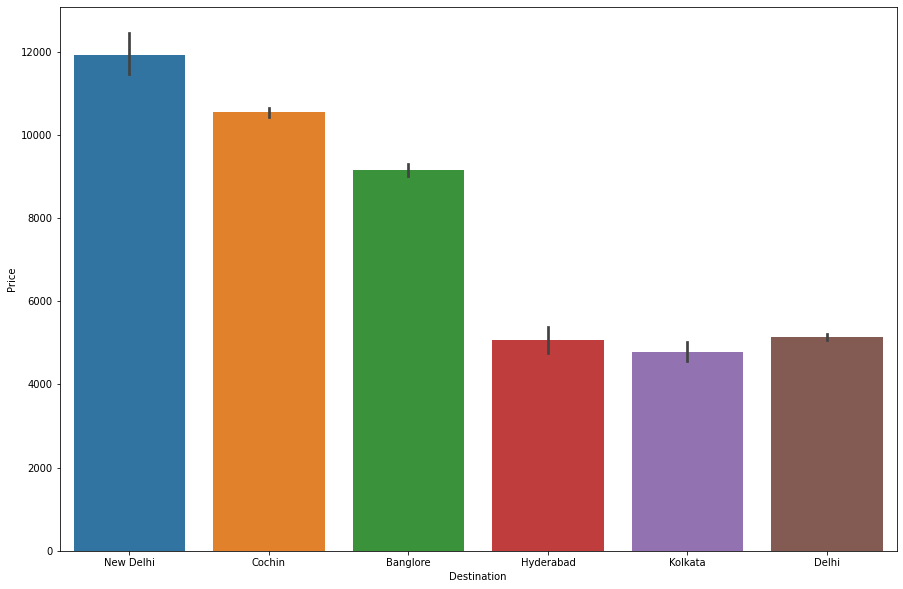

In [31]:

plt.figure(figsize=(15,10)) 
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False)) 
plt.show()

In [32]:
## Dehli and and New Delhi are the same so replacing New Delhi with Delhi

for i in df:
  df.replace('New Delhi','Delhi',inplace=True)

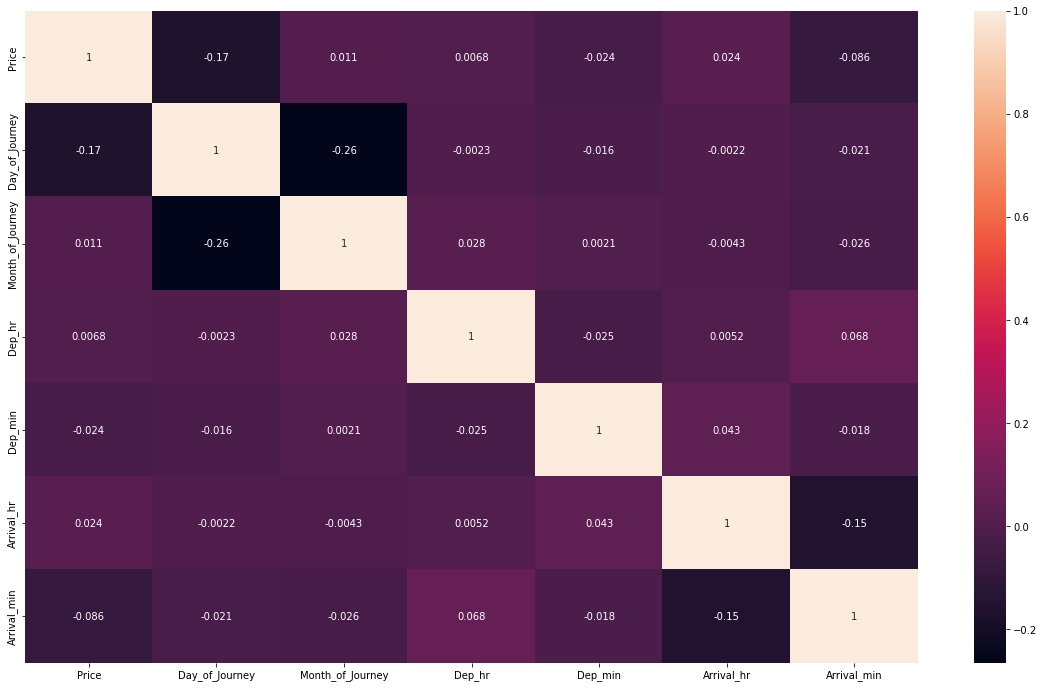

In [33]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(),annot=True)


The features are less correlated which is a good thing in order to avoid Multicollinearity

In [34]:
#Handling Categorical Values
df['Total_Stops']=df['Total_Stops'].map({'non­stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops' :4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True) 
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [35]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [36]:
df.shape

(10682, 31)

In [37]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


##Test Data|

In [38]:
df_test= pd.read_excel("/content/Test_set.xlsx")

In [39]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
df_test.shape

(2671, 10)

Adjusting the testing data as the train data

In [41]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute


df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

a=df_test['Duration'].str.split(' ',expand=True) 
a[1].fillna('00m',inplace=True) 
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

df_test['Total_Stops']=df_test['Total_Stops'].map({'non­stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True) 
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [42]:
print("Shape of Train:", df.shape)
print("Shape of Test:", df_test.shape)

Shape of Train: (10682, 31)
Shape of Test: (2671, 28)


In [43]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [44]:
x= df.drop(['Route', 'Price','Additional_Info'], axis=1)
y= df["Price"]

In [45]:
x.shape

(10682, 28)

In [46]:
y.shape

(10682,)

In [47]:
x.fillna(0, inplace= True)

##Model Building and Hyperparameter Tuning

###Extra Regressor

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

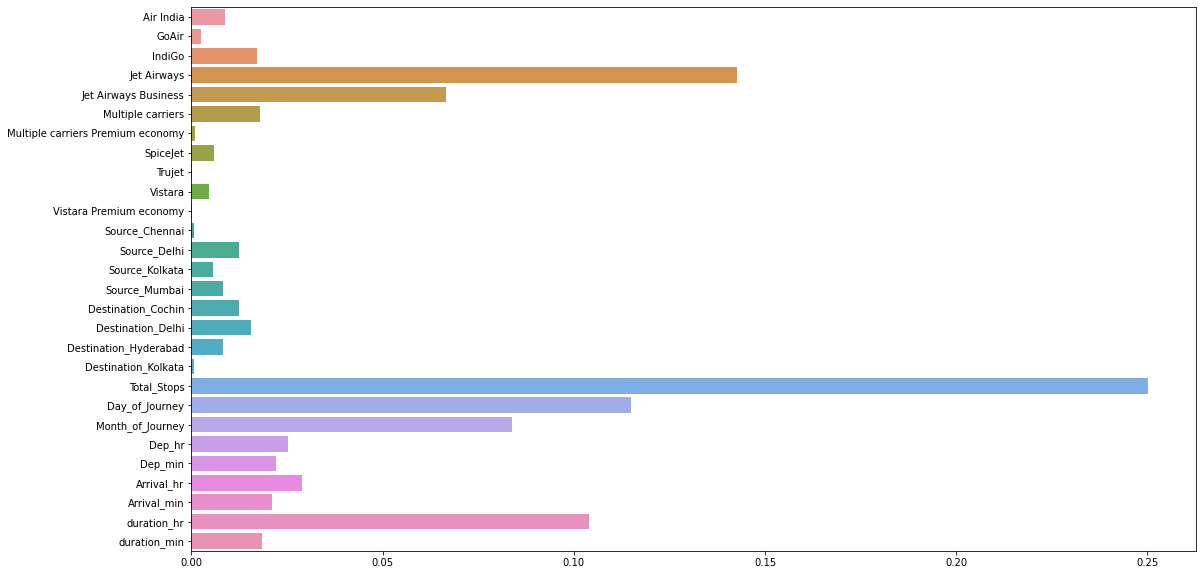

In [49]:
plt.figure(figsize=(18,10))
sns.barplot(x=ET_Model.feature_importances_, y=x.columns, orient="h")


In [50]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [51]:
from sklearn.ensemble import ExtraTreesRegressor 
ET_Model=ExtraTreesRegressor(n_estimators = 120) 
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
from sklearn.metrics import r2_score 
r2_score(y_test,y_predict)

0.7695190283376385

##Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor 
RF_Model=RandomForestRegressor() 
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test) 
r2_score(y_test,y_predict)

0.7931623970570693

In [53]:
##Hypeparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 8, stop = 15, num = 5)] 
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 15, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

params_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

grid= RandomizedSearchCV(RF_Model, params_grid,verbose=1)


In [54]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [6, 8, 10, 12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [8, 9, 11, 13, 15]},
                   verbose=1)

In [55]:
print(grid.best_params_)

{'n_estimators': 11, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 12}


In [56]:
rf_model= RandomForestRegressor(n_estimators= 8, min_samples_split= 10, min_samples_leaf= 10, max_features= 'auto', max_depth= 15
)

In [57]:
rf_model.fit(x_train,y_train)
y_predict=rf_model.predict(x_test) 
r2_score(y_test,y_predict)

0.7803506308383785

In [58]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 53 kB/s 


In [59]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(x_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 48.4ms	remaining: 48.4s
1:	learn: 4317.7245126	total: 50.6ms	remaining: 25.3s
2:	learn: 4167.9871081	total: 53.1ms	remaining: 17.6s
3:	learn: 4030.4839609	total: 55.7ms	remaining: 13.9s
4:	learn: 3906.4844760	total: 59.3ms	remaining: 11.8s
5:	learn: 3785.4580402	total: 61.3ms	remaining: 10.2s
6:	learn: 3673.8662552	total: 63.1ms	remaining: 8.95s
7:	learn: 3582.0533069	total: 67.1ms	remaining: 8.32s
8:	learn: 3495.5629367	total: 70.1ms	remaining: 7.72s
9:	learn: 3404.7478335	total: 73ms	remaining: 7.23s
10:	learn: 3325.1004431	total: 75.2ms	remaining: 6.76s
11:	learn: 3254.1004651	total: 77ms	remaining: 6.34s
12:	learn: 3184.6084064	total: 78.9ms	remaining: 5.99s
13:	learn: 3122.3064005	total: 80.9ms	remaining: 5.7s
14:	learn: 3067.6550706	total: 82.7ms	remaining: 5.43s
15:	learn: 3014.5169632	total: 84.6ms	remaining: 5.2s
16:	learn: 2962.4252595	total: 86.4ms	remaining: 4.99s
17:	learn: 2920.1931240	total: 88.3ms	remaining: 4.

In [60]:
cat_pred=cat.predict(x_test)

In [61]:
r2_score(y_test,cat_pred)

0.8273858089678572

In [62]:
!pip install lightgbm

In [63]:
x_train[['duration_hr','duration_min']]=x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']]=x_test[['duration_hr','duration_min']].astype(int)

In [64]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(x_train,y_train)

LGBMRegressor()

In [65]:
lgb_pred=lgb_model.predict(x_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [66]:
!pip install xgboost

In [67]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor() 
xgb_model.fit(x_train,y_train) 
xgb_pred=xgb_model.predict(x_test) 
r2_score(y_test,xgb_pred)

[22:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7360850618843358

In [68]:
 #Use pickle to save our model so that we can use it later
import pickle
# # Saving model to disk
pickle.dump(ET_Model,open("model_ET","wb"))
model=pickle.load(open("model_ET","rb"))

In [69]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [71]:
deploy_df.to_csv('deploy_df')